# Visualisations

# 1. Import Files
# 2. EDA & Descriptive Analysis 
#2.1 Analyse Orders Day of Week
#2.2 Analyse Prices Distribution using Histogram
#2.3 Analyse Prices vs Orders day of the week
#2.4 Analyse Order Hour of Day
#2.5 Analyse Customer Loyalty Types
#2.6 Analyse Order Hours of Day vs Prices 
#2.7 Age vs Dependents

In [8]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy



#import the file

In [9]:
path = r'C:\Users\Raghu\Instacart Basket Analysis\01 Project Management\02 Data\03 Scripts\prepared data\02 Data\Prepared Data\ords_prods_customers_left.pkl'


In [10]:
path = r'C:\Users\Raghu\Instacart Basket Analysis\01 Project Management\02 Data\03 Scripts\prepared data\02 Data\Prepared Data\orders_products_cust_types.pkl'


In [11]:
file_path = os.path.join(path, '02 Data', 'Prepared Data' , '03 Scripts' , 'Prepared Data' , 'ords_prods_customers_left.pkl')


In [ ]:
df_ords_customers = pd.read_csv(r'C:\Users\Raghu\Instacart Basket Analysis\01 Project Management\02 Data\03 Scripts\prepared data\02 Data\Prepared Data\ords_prods_customers_left.pkl', encoding='ISO-8859-1')


In [5]:
import pandas as pd

In [6]:
df_ords_customers = pd.read_pickle(r'C:\Users\Raghu\Instacart Basket Analysis\01 Project Management\02 Data\03 Scripts\prepared data\02 Data\Prepared Data\ords_prods_customers_left.pkl')


In [7]:
df_ords_customers.shape


(1048586, 31)

In [8]:
df_ords_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048586 entries, 0 to 1048585
Data columns (total 31 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   Unnamed: 0.1            1048586 non-null  int64         
 1   product_id              1048586 non-null  int64         
 2   product_name            1047682 non-null  object        
 3   aisle_id                1048586 non-null  int64         
 4   department_id           1048586 non-null  int64         
 5   prices                  1048586 non-null  float32       
 6   Unnamed: 0              1048586 non-null  int64         
 7   order_id                1048586 non-null  int64         
 8   user_id                 1048586 non-null  int64         
 9   order_number            1048586 non-null  int64         
 10  order_of_week           1048586 non-null  int64         
 11  oder_hour_of _day       1048586 non-null  int64         
 12  days_since_pri

## 2. EDA & Descriptive Analysis


##### 2.1 Analyse Orders Day of Week

In [9]:
# count rows for each day of the week
df_ords_customers['order_of_week'].value_counts()

order_of_week
0    198588
1    177955
6    147197
5    140849
2    136797
3    123638
4    123562
Name: count, dtype: int64

#### 2.11 Distribution bar graph

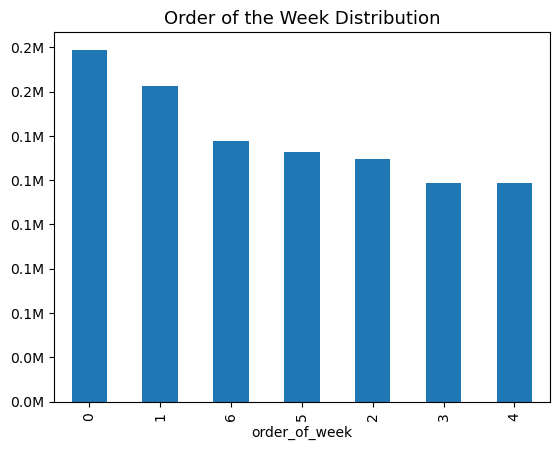

In [36]:
# plot a bar chart on order_of_week value counts to see the distribution. Sorted by largest to smallest
plt.title('Order of the Week Distribution', fontsize=13)
ax=df_ords_customers['order_of_week'].value_counts().plot.bar()
#formats y-axis as M (millions)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.1f')+'M'))

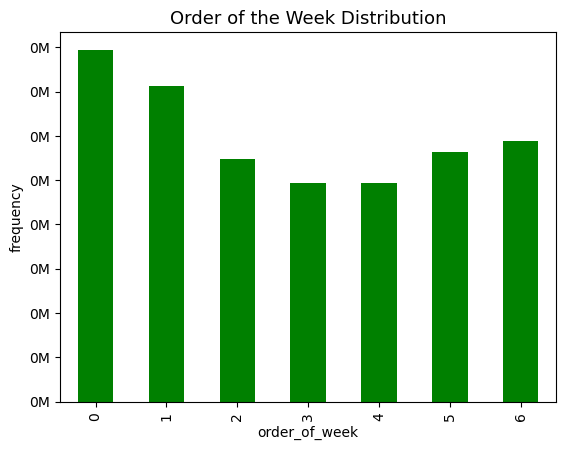

In [41]:
# bar chart of orders_days_of_week distribution sorted by order__of_week
#formats y-axis as M (millions)
plt.title('Order of the Week Distribution', fontsize=13)
bar_odow = df_ords_customers['order_of_week'].value_counts().sort_index().plot.bar(color=['green'], x='order of the week', ylabel='frequency')
bar_odow.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'M'))

#### 2.12 Export the bar graph

as the image is not saving i have made few changes to the code and saved the image in the directory

In [42]:
visualization_dir = os.path.join(r'C:\Users\Raghu\Instacart Basket Analysis\01 Project Management\02 Data\03 Scripts\04 Analysis', 'Visualizations')


In [47]:
os.makedirs(visualization_dir, exist_ok=True)


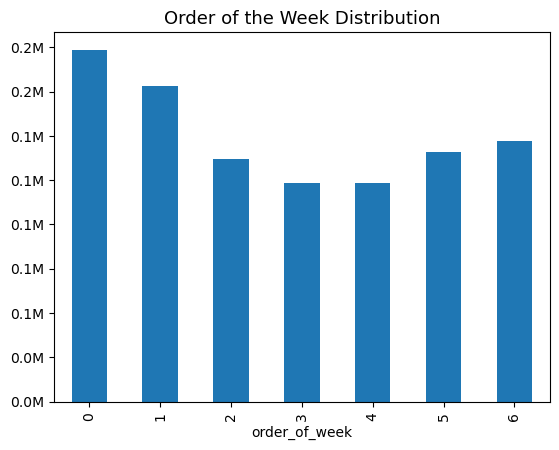

In [61]:
fig, ax = plt.subplots()
ax.set_title('Order of the Week Distribution', fontsize=13)
df_ords_customers['order_of_week'].value_counts().sort_index().plot.bar(ax=ax)  # Sort by index to maintain order
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: format(x / 1000000, '1.1f') + 'M'))


In [62]:
fig.savefig(os.path.join(visualization_dir, 'bar_odow.png'))


In [63]:
plt.show()


### 2.2 Analyse Prices Distribution using Histogram

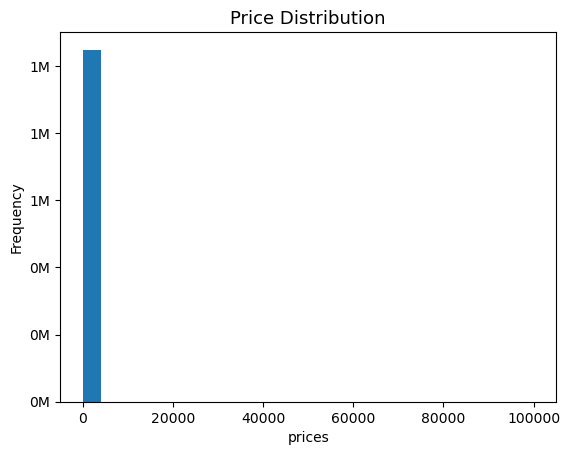

In [65]:
plt.title('Price Distribution', fontsize=13)
bar_prices = df_ords_customers['prices'].plot.hist(bins=25, xlabel='prices')    
bar_prices.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000, '1.0f')+'M'))
  

# historgram of prices using 70 bins

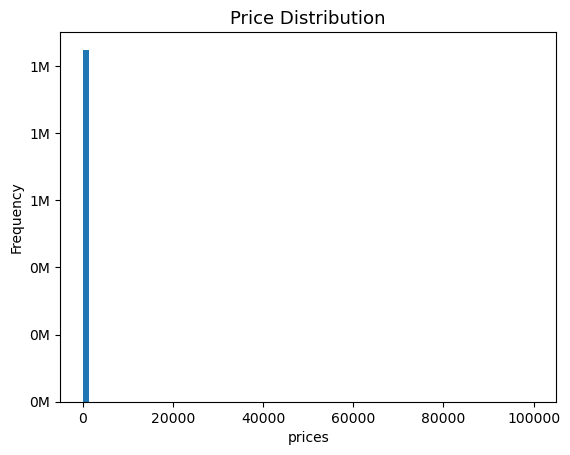

In [66]:
bar_prices = df_ords_customers['prices'].plot.hist(bins=70, xlabel='prices')
plt.title('Price Distribution', fontsize=13)
bar_prices.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000, '1.0f')+'M'))

#### Export the histogram

In [67]:
bar_prices.figure.savefig(os.path.join(visualization_dir, 'prices_hist.png'))

### 2.3 Analyse Prices vs Orders day of the week

#### Split the dataframes to 70/30

#spliting dataframes into 70/30 by assigning 'True' to random number less than 0.7 and 'False' to more
create the random seed so its replicable


In [70]:
np.random.seed(4)


In [71]:
# Create a list of (True, False) values based on random assignment of values between 0-1 and is less than 0.7
dev = np.random.rand(len(df_ords_customers)) <= 0.7


In [72]:
# Stores 70% of data sample in big dataframe (<= 0.7)
big = df_ords_customers[dev]

In [73]:
# Stores 30% of data sample in small dataframe (> 0.7)
small = df_ords_customers[~dev]

In [74]:
# Checking the length of the dataframes\n",
big_len = len(big)
small_len = len(small)
big_len + small_len

1048586

In [75]:
len(df_ords_customers)

1048586

#### Plot line chart of orders_days_of_week and prices

In [77]:
# To plot the graph, extracting orders_day_of_week and prices
df_2 = small[['order_of_week', 'prices']]
df_2.head()

,order_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

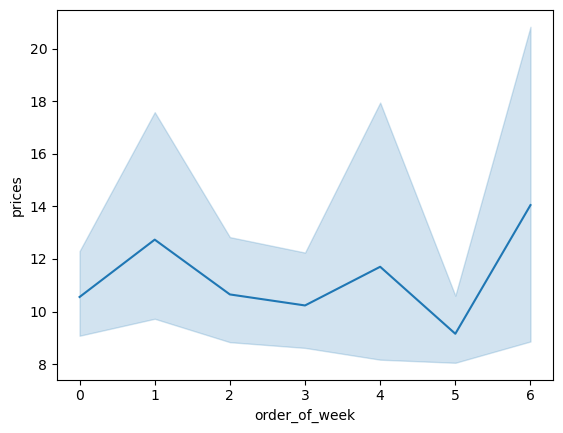

In [79]:
line = sns.lineplot(x='order_of_week', y='prices', data=df_2)

In [81]:
line.figure.savefig(os.path.join(visualization_dir, 'prices_hist.png'))

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

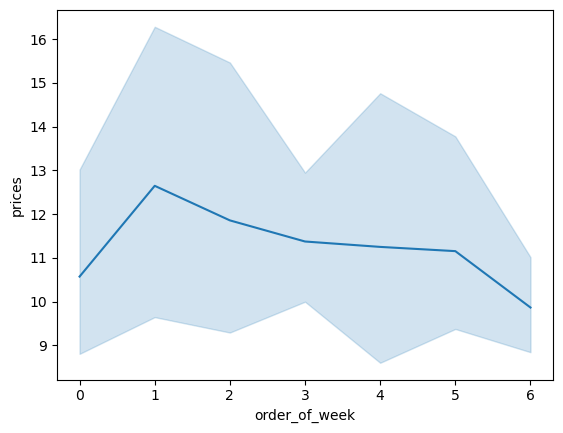

In [85]:
#df_3 = big[['order_of_week', 'prices']]
line = sns.lineplot(x='order_of_week', y='prices', data=df_3)

### 2.4 Analyse Order Hour of Day

In [86]:
df_ords_customers.head()

,Unnamed: 0.1,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0,order_id,user_id,order_number,...,mean_expenses,first_name,Surnam,gender,state,age,date_joined,n_dependants,fam_status,income
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,16802,3139998,138,28,...,5.8,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
1,1,1,Chocolate Sandwich Cookies,61,19,5.8,16806,1977647,138,30,...,5.8,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
2,2,1,Chocolate Sandwich Cookies,61,19,5.8,106710,389851,709,2,...,5.8,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302
3,3,1,Chocolate Sandwich Cookies,61,19,5.8,113536,652770,764,1,...,5.8,Heather,Myers,Female,Wisconsin,40,2020-02-09,3,married,31308
4,4,1,Chocolate Sandwich Cookies,61,19,5.8,113575,1813452,764,3,...,5.8,Heather,Myers,Female,Wisconsin,40,2020-02-09,3,married,31308


In [89]:
df_ohoy = df_ords_customers[['oder_hour_of _day']]

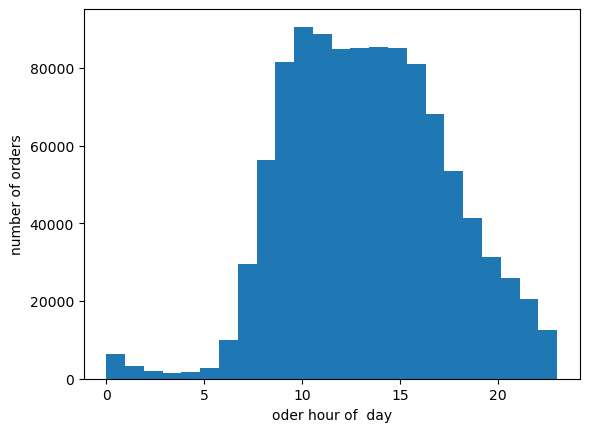

In [91]:
hist_ohoy = df_ohoy['oder_hour_of _day'].plot.hist(bins=24, xlabel='oder hour of  day', ylabel='number of orders')

#### Export the histogram

In [92]:
hist_ohoy.figure.savefig(os.path.join(visualization_dir, 'bar_orders_hours_distribution.png'))


#### Observations:
    
    1. Peak hours for order is between 10am - 4pm
    2. Most orders are made at 10am, 11am and 2pm
    3. Off peak hours (minimum orders) are between 12am to 5am.

In [93]:
df_ohoy['oder_hour_of _day'].value_counts()

oder_hour_of _day
10    90558
11    88668
14    85384
13    85135
15    85118
12    84745
9     81390
16    80912
17    68157
8     56381
18    53358
19    41350
20    31293
7     29474
21    25903
22    20509
23    12563
6      9990
0      6368
1      3165
5      2834
2      1992
4      1776
3      1563
Name: count, dtype: int64

 ### 2.A nalyse Order Hours of Day vs Prices

#### Extract order_hour_of_day and prices from sample 

In [134]:
## extracting relevant columns and checking the dataframe
df_small_ohod_prices = small[['oder_hour_of _day', 'prices']]
df_small_ohod_prices.head()

,oder_hour_of _day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8


#### Line graph: order_hour_of_day vs prices

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

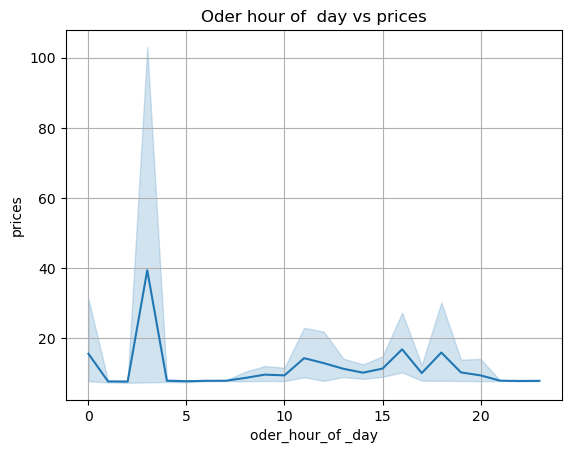

In [135]:
# Create a line graph to check correlation between order hours and prices
line_ohod_prices = sns.lineplot(data=df_small_ohod_prices, x='oder_hour_of _day', y='prices')
line_ohod_prices.set(xlabel='oder_hour_of _day')
plt.title('Oder hour of  day vs prices')
plt.grid()

In [136]:
line_ohod_prices.figure.savefig(os.path.join(visualization_dir, 'line_order_hours_vs_prices.png'))

#### Observations: 
 #1.Expenses are highest at 4am
  #2.Overall expenses are higher betwwen 10pm and 7am, with peaks at 10pm, 1am, 4am and 7am

### 2.7 Age vs Dependents

#### Extract age and depenandants

In [137]:
# Extract age and depenandants into a dataframe
df_age_dependants = df_ords_customers[['age','n_dependants']]

In [138]:
df_age_dependants.head()

,age,n_dependants
0,81,1
1,81,1
2,66,2
3,40,3
4,40,3


#### Line Graph : Age vs No of Dependants

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

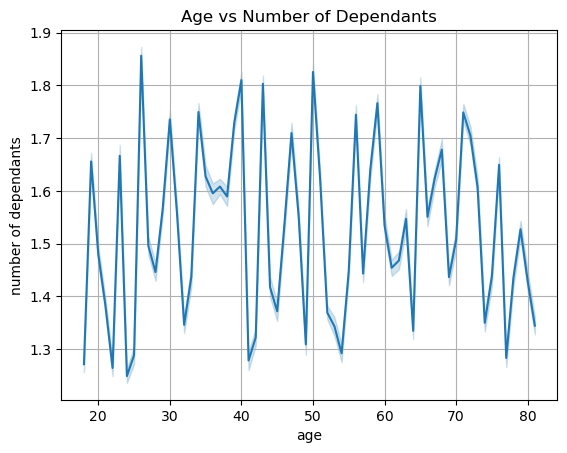

In [139]:
# create a line graph using seaborn to check for correlation
line_age_ndependants = sns.lineplot(data=df_age_dependants, x='age', y='n_dependants')
line_age_ndependants.set(xlabel='age', ylabel='number of dependants')
plt.title('Age vs Number of Dependants')
plt.grid()

#### Export line graph

In [140]:
line_age_ndependants.figure.savefig(os.path.join(visualization_dir, 'line_age_ndependants.png'))

#insights
There is no correlation between age and number of dependants

#### Number of customers by family status using bar graph

In [141]:
# extract fam_status and user_id into separate dataframe
df_fam_status_dependants = df_ords_customers[['fam_status','user_id']]
df_fam_status_dependants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048586 entries, 0 to 1048585
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   fam_status  1048586 non-null  object
 1   user_id     1048586 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 16.0+ MB


In [142]:
## Count unique users per fam_status
fam_users_no = df_fam_status_dependants.groupby(['fam_status'], as_index=False).agg({'user_id': 'nunique'})
fam_users_no

,fam_status,user_id
0,divorced/widowed,577
1,living with parents and siblings,339
2,married,4769
3,single,1069


# Create a bar graph to show the user distribution based on family status


C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


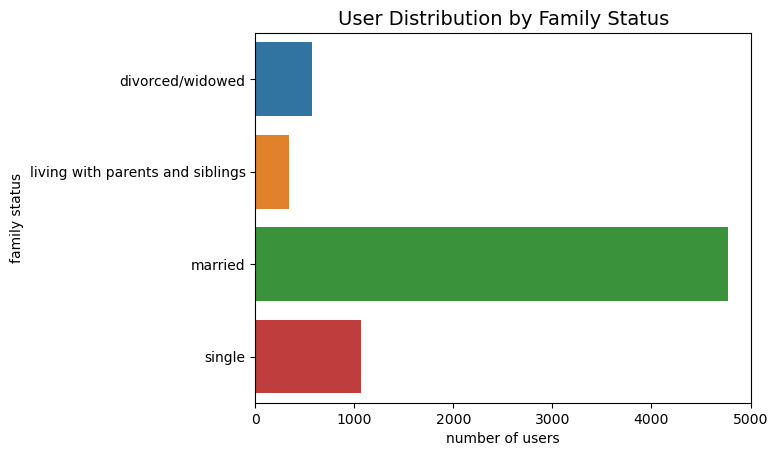

<Figure size 900x1100 with 0 Axes>

In [143]:
bar_fam_users = sns.barplot(y='fam_status', x='user_id', data=fam_users_no)
bar_fam_users.set(ylabel='family status', xlabel='number of users')
plt.title('User Distribution by Family Status', fontsize=14)
fig = plt.figure(figsize=(9, 11))

#### Explort bar graph

In [145]:
bar_fam_users.figure.savefig(os.path.join(visualization_dir, 'bar_fam_users.png'), bbox_inches = 'tight')

#### Insight: Significant number of users are married, followed by single

### 2.7 Age vs Income (Spending power)

#### Extract age and income

In [146]:
# Extract age and income into a separate dataframe
df_age_income = df_ords_customers[['age', 'income']]
df_age_income.head()

,age,income
0,81,49620
1,81,49620
2,66,158302
3,40,31308
4,40,31308


#### Scatterplot: Age vs Income

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'age'), Text(0, 0.5, 'income')]

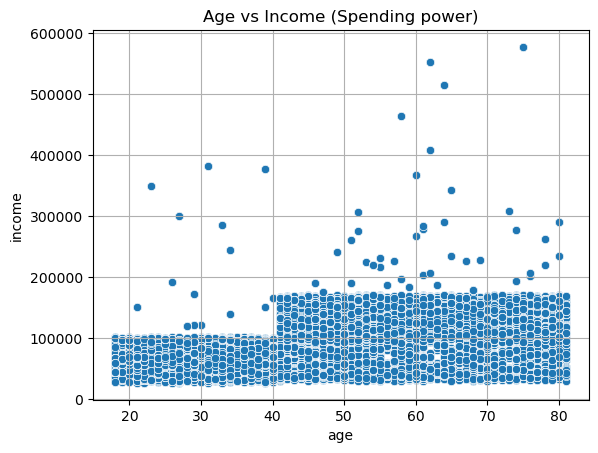

In [147]:
# Create a scatterplot to see the correlation between age and income
scatter_age_income = sns.scatterplot(x='age', y='income', data=df_age_income)
plt.grid()
plt.title('Age vs Income (Spending power)')
scatter_age_income.set(xlabel='age', ylabel='income')

#### Export scatterplot

In [148]:
scatter_age_income.figure.savefig(os.path.join(visualization_dir, 'scatter_age_income.png'))

#### Insights
    
    1. Ages between 18 to 40 have lower spending power compared to above 40
    2. Customers between 18 and 40 have income less than 400,000. Larger subset of customers have less than 200,000
    3. Customers above 40 surpass 400,000 and earn upto 600,000

In [1]:
path = r'C:\\Users\\Raghu\\Instacart Basket Analysis\\01 Project Management\\02 Data\\03 Scripts\\Prepared Data'

In [5]:
import pandas as pd


NameError: name 'pd' is not defined

In [6]:
ords_prods_cust_merge = pd.read_pickle(r'C:\Users\Raghu\Instacart Basket Analysis\01 Project Management\02 Data\03 Scripts\prepared data\02 Data\03 Scripts\Prepared Data\orders_products_merged_updated.pkl')


In [13]:
ords_prods_custs_merge = pd.read_pickle(r'C:\Users\Raghu\Instacart Basket Analysis\01 Project Management\02 Data\03 Scripts\prepared data\02 Data\03 Scripts\Prepared Data\orders_products_merged_updated.pkl')


In [14]:
ords_prods_custs_merge.to_pickle(os.path.join(path, '02 Data', '03 Scripts', 'Prepared Data', 'ords_prods_custs_merge.pkl'))

OSError: Cannot save file into a non-existent directory: 'C:\Users\Raghu\Instacart Basket Analysis\01 Project Management\02 Data\03 Scripts\prepared data\02 Data\Prepared Data\orders_products_cust_types.pkl\02 Data\03 Scripts\Prepared Data'